# Model Predictions

In [1]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

In [4]:
all_attacks = pd.read_parquet("../data/netflow_sample.parquet")["Label"].unique()
all_attacks

array(['Benign', 'DoS', 'XSS', 'DDoS', 'Bot', 'Infiltration', 'Injection',
       'Scanning', 'Password'], dtype=object)

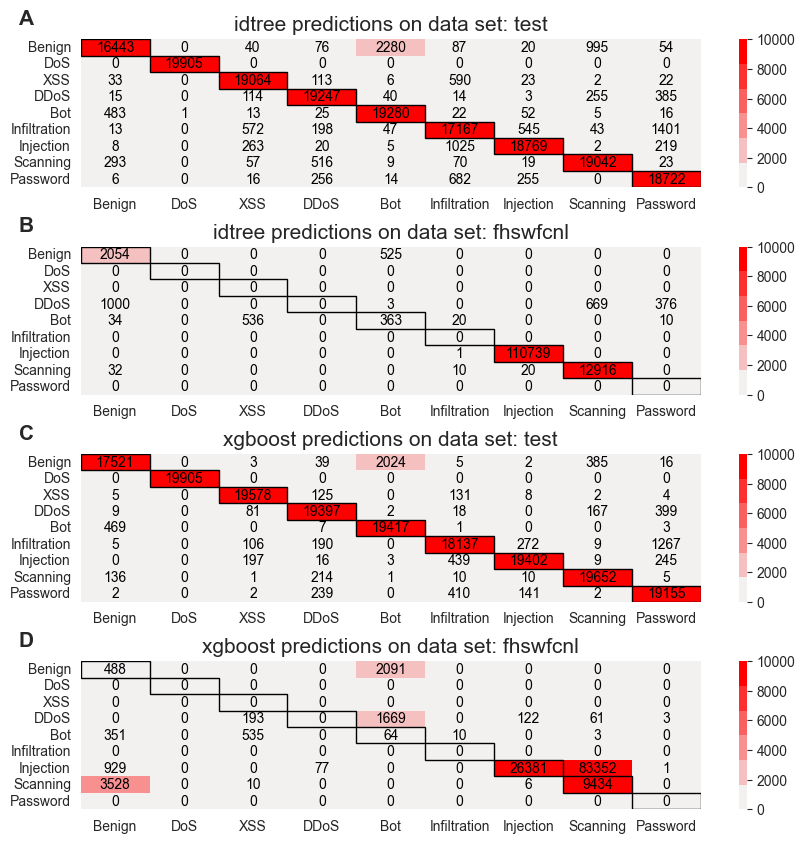

In [8]:
models = ["idtree", "xgboost"]
matrices = dict()

for model in models:
    for data_set in ["test", "fhswfcnl"]:
        with open(f"../scores/{model}_{data_set}.pkl", "rb") as file:
            matrices[(model,data_set)] = pickle.load(file)['matrix']



f, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10), sharey=True)

diagonals = [(i,i) for i in range(len(all_attacks))]
alpha = ["A", "B", "C", "D"]

for idx, (ax, (key, matrix)) in enumerate(zip(axes, matrices.items())):
    sns.heatmap(matrix, annot=True, fmt='g', annot_kws={'color':"black"}, ax=ax,
                 cmap=sns.light_palette("red"), vmin=0, vmax=10000,
                 yticklabels=all_attacks, xticklabels=all_attacks)

    model, data_set = key
    ax.set_title(f"{model} predictions on data set: {data_set}", fontdict={"fontsize":15}),
    ax.text(-0.1, 1.1, alpha[idx], transform=ax.transAxes, size=15, weight='bold')
    for item in diagonals:
        ax.add_patch(Rectangle(item, 1, 1, fill=False, edgecolor='black', lw=1))

plt.subplots_adjust(hspace=0.4)
plt.savefig(f'../img/model_predictions.png', bbox_inches='tight')